#### Importando Libs

In [213]:
import pandas as pd
import numpy as np

from sklearn import datasets

#metricas
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score, precision_score, recall_score, precision_recall_curve

#Regrassãõ
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


#Classificador
from sklearn import tree #Tem uma estrutura de árvore que será usada
from sklearn.tree import DecisionTreeClassifier #Classificador que gera uma árvore de regras
from sklearn.neighbors import KNeighborsClassifier

# Separação dos dados entre treino e teste.
from sklearn.model_selection import train_test_split

# Graficos.
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#### Coletando Dataset Diabetes

In [192]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### Exibindo os Dados

In [193]:
iris['data'][0]

array([5.1, 3.5, 1.4, 0.2])

#### Exibindo a feature target

In [194]:
iris['target'][0]

0

#### Nomes das features

In [195]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Nome das classificações da features alvo.

In [196]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Coletando Dataset Diabetes - regressão

In [197]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [198]:
diabetes['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [199]:
diabetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [200]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [214]:
cali = datasets.fetch_california_housing()
cali

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## Regrassão

#### LinearRegression

In [215]:
# Separando as colunas de interesse
X = cali['data']
y = cali['target']
features = diabetes['feature_names']


# separando dados para trino e teste.
# test_size = 0.2 % 20% para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Criar modelo
lr = LinearRegression()

# treinar modelo.
lr.fit(X_train, y_train)

#Predição dos dados de Teste
y_pred = lr.predict(X_test)

# Verifica os erros.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calcular o R Squared
r2 = r2_score(y_test,y_pred)

#### Resultados.
- MSE
- RMSE
- R2
- Coefficients
- Intercept

In [216]:
# Print de valores.
print("MSE Value: ", round(mse, 2))
print("RMSE Value: ", round(rmse,2))
print("R2 Value: ", round(r2, 2))
print ('Coefficients: ', lr.coef_[0])
print ('Intercept: ', lr.intercept_)

MSE Value:  0.53
RMSE Value:  0.73
R2 Value:  0.6
Coefficients:  0.4458225653062099
Intercept:  -37.05624133152509


#### LogisticRegression

In [203]:
# Separando os dados de entrada e saída
X = diabetes['data']
y = diabetes['target']

# Divisao dos dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Criacao do modelo
model = LogisticRegression(random_state = 42)

# Treinamento do modelo
model.fit(X_train, y_train)

# Predicao dos dados de teste
y_pred = model.predict(X_test)

# Verifica os erros.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calcular o R Squared
r2 = r2_score(y_test,y_pred)

In [204]:
# Print de valores.
print("MSE Value: ", round(mse, 2))
print("RMSE Value: ", round(rmse,2))
print("R2 Value: ", round(r2, 2))
print ('Coefficients: ', lr.coef_[0])
print ('Intercept: ', lr.intercept_)

MSE Value:  8099.96
RMSE Value:  90.0
R2 Value:  -0.5
Coefficients:  29.254013025173343
Intercept:  151.00821291456543


## Classificação

#### KNeighborsClassifier

In [205]:
# dados de entrada e saida.
X2 = iris['data']
y2 = iris['target']

# Divisao dos dados em treinamento e teste
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

# Definicao do numero de vizinhos de forma arbitraria
# hyper parametros, impacta na performance do modelo. pode ser alterado. numero de cluster.
k = 7

# Criacao do modelo
knn = KNeighborsClassifier(k)

# Treinamento
knn.fit(X_train2, y_train2)

# Teste
y_pred2 = knn.predict(X_test2)


# Metricas corretas para classificação
# Avaliando o desempenho
acc_knn = accuracy_score(y_test2, y_pred2)

precision_knn = precision_score(y_test2, y_pred2, average='macro')

recall_knn = recall_score(y_test2, y_pred2, average='macro')

f1_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn)

report_lr1 = classification_report(y_test2, y_pred2)

#### Resultados.
- Acuracia
- Precisão
- Recall
- F1-score

In [206]:
print("Acracia:", round(acc_knn,2)*100)
print("Precisão:", round(precision_knn,2)*100)
print("Recall:", round(recall_knn,2)*100)
print(f'F1-score: {f1_knn:.2f}')

Acracia: 98.0
Precisão: 97.0
Recall: 98.0
F1-score: 0.98


In [207]:
print(report_lr1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### DecisionTreeClassifier

In [208]:
# Divisao de dados em treinamento e teste
clf = DecisionTreeClassifier(criterion="entropy")
    
    
baseAtributos = X_train2
baseRotulos = y_train2

clf.fit(baseAtributos, baseRotulos)

DecisionTreeClassifier(criterion='entropy')

In [209]:
y_pred_tree = clf.predict(X_test2)

acc_rf_tree = accuracy_score(y_test2, y_pred_tree)
precision_tree = precision_score(y_test2, y_pred_tree, average='macro')
recall_tree = recall_score(y_test2, y_pred_tree, average='macro')
f1_tree = 2 * (precision_tree * recall_tree) / (precision_tree + recall_tree)
report_lr1_tree = classification_report(y_test2, y_pred_tree)

#### Resultado

In [210]:
print("Acuracia:", round(acc_rf_tree,2)*100)
print("Precisão:", round(precision_tree,2)*100)
print("Recall:", round(recall_tree,2)*100)
print(f'F1-score: {f1_tree:.2f}')

Acuracia: 98.0
Precisão: 97.0
Recall: 98.0
F1-score: 0.98


In [211]:
print(report_lr1_tree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



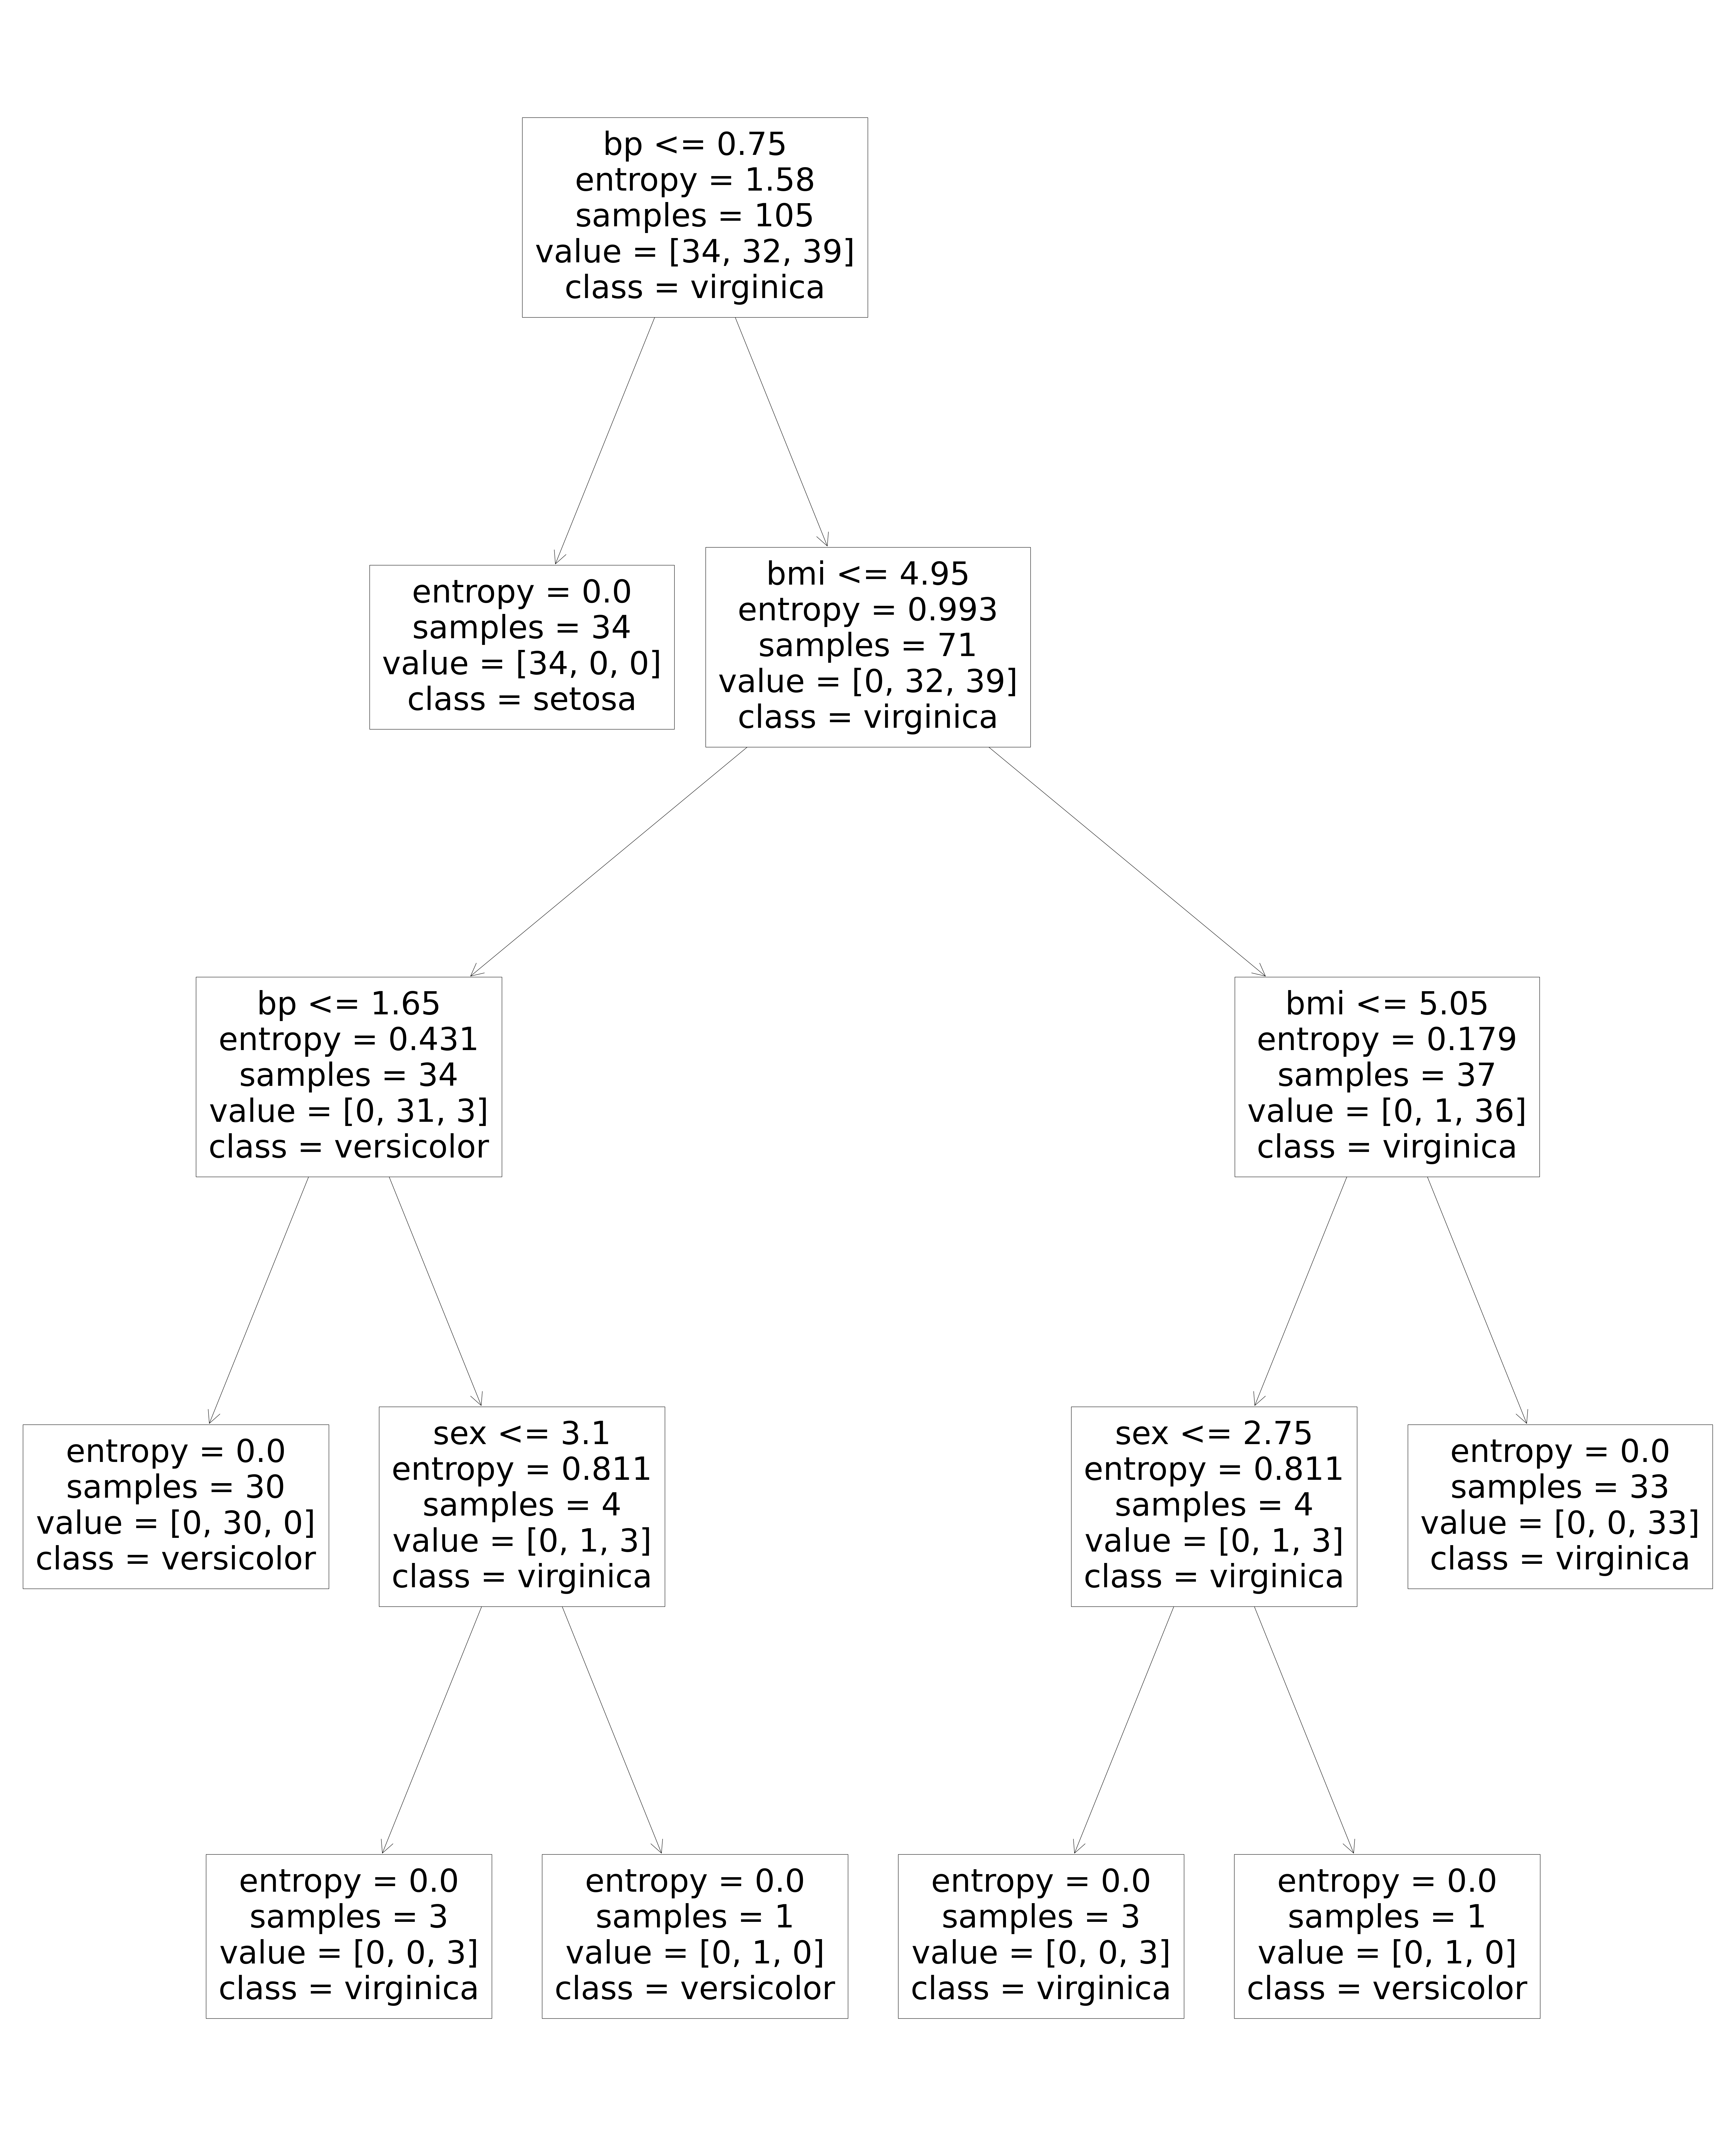

In [212]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(80,100))
tree.plot_tree(clf, feature_names=features, class_names=targets,  ax=ax, filled=False)
plt.show()